In [2]:
from pathlib import Path

import numpy as np
import matplotlib.pyplot as plt

## To review 

*Masks* are a useful way to identify parts of an array that you are interested in using. We can use logic statements or boolean arrays to do this. Our mask has to match in shape to the array of interest

### `np.where()`: Turning a mask into indices

In [ ]:
x = np.arange(20).reshape((4, 5))
x

The `np.where` function returns the locations of the elements where the given condition is `True` by their **coordinates**. This is different than the way our normal Boolean mask works. See below

In [ ]:
print(x<12)
print(np.where(x < 12))


Note: both of these are valid ways to mask an array and yield the same results.

In [ ]:
print(x[x < 12]) 
print(x[np.where(x<12)])

**NOTE:** Instead of returning just the locations of elements `np.where` can also return elements from one of two arrays based on the condition. You can find details [here](https://numpy.org/doc/stable/reference/generated/numpy.where.html?highlight=where#numpy.where)

### Indexing with other sequences

We can also index elements of arrays using other arrays whose elements denote the indices of the elements to be selected.

In [ ]:
x = np.arange(16).reshape((4, 4))
x

In [ ]:
x[range(4), range(4)] # (0,0) (1,1) (2,2) and (3,3)

The image below from [scipylectures.org](https://scipy-lectures.org/intro/numpy/array_object.html#fancy-indexing) summarizes fancy indexing.

<img src="data/img/np_fancy_indexing.png" height=300px width=650px>

### Indexing based on another array

Sometimes we care more about multiple properties of an object for classification purposes. Below we have some randomly generated people, their ages, heights [cm] and favorite colors. 

Note: the ages and heights store as strings, so you can use .astype(int) to change them to integers

In [ ]:
fake_people = np.array([
    ['Richard Burden', 25, 185, 'Blue'],
    ['Marc Serrano', 48, 178, 'Red'],
    ['Helen Heath', 42, 168, 'Black'],
    ['Janice Parker', 34, 164, 'Blue'],
    ['Kathleen Harris', 27, 172, 'Purple'],
    ['Gary Womack', 22, 179, 'Black'],
    ['Mary Roughton', 46, 171, 'Blue'],
    ['Donald Dewberry', 35, 190, 'Blue'],
    ['Bryon Martin', 27, 179, 'Red'],
    ['Elizabeth Johnson', 49, 170, 'Purple'],
    ['Ollie Lee', 28, 172,'Purple'],  
    ['Angelo Aviles', 34, 170, 'Blue'] ])
names   = fake_people[]
ages    = fake_people[].astype(int)
heights = fake_people[].astype(int)
colors  = fake_people[]


This sample data is hopefully enough to be applicable to other cases in astronomy, potentially objects and telescopes the data is taken from etc.

In the cell below, using fancy array slicing, find out the following:
- The names of people under 30 years old
- The favorite colors of people below the average height 
- The ages and names of people with the favorite color blue


Not so bad! Now we can be even more selective by searching over multiple criteria using logic statements. All you have to do is
`array[(logic1) *logical* (logic2)]`

Using logic statements find the following:
- The names of the tallest and shortest person (we do not care who is who, just get the names)
- The names of people above average height younger than 30 

### Classifying the pretty pictures

Another `.npy` file (`data/sdss_morpho.npy`) has been provided which contains morphological classification of the galaxies we dealt with in the previous notebook. The galaxy is *spheroidal* if the value of the corresponding element is `0` and *discy* if the value is `1`. First read the two data files (images and morphologies) into NumPy arrays.

In [ ]:
path_img = Path("./data/sdss.npy")
path_morpho = Path("./data/sdss_morpho.npy")
# COMPLETE THESE TWO LINES OF CODE
img = 
morpho =

Which of the indices have *discs*? Use `np.where` to find it out.

In [ ]:
np.where()                    #COMPLETE THIS LINE OF CODE

Now that you know the indices, use them to select all the spheroidal galaxies.  
**NOTE** that `np.where` returns a tuple. Since we are interested in the values use `np.where(value)[0]`. Check the documentation to see why it is so. Use `np.where?` or press `Shift` + `tab` with the cursor on `np.where`.

In [ ]:
spheroid_img =                  #COMPLETE THIS LINE OF CODE

Flag all the pixels which have negative values by replacing them with `np.nan`.

In [ ]:
spheroid_img[] =               #COMPLETE THIS LINE OF CODE

Now plot the $r$ wavelength band of all these spheroids in a similar way to the last notebook.

In [ ]:
# COMPLETE THESE TWO LINES OF CODE
for i in range(): #loop over the number of spheroids
    plt.imshow(np.tanh(spheroid_img[]) , cmap="viridis") #select the correct galaxy and wavelength band

You can see, `matplotlib` does not plot points marked with `np.nan`. This is a great way to flag points that you do not want to be plotted. A more sophisticated way to flag bad data points is to use `masked arrays`. Check them out [here](https://numpy.org/doc/stable/reference/maskedarray.html)

# Array shape manipulation

NumPy lets us rearrange the elements in an array and reshape them into other forms.   
### Flattening
We can unpack the elements of a multidimensional array into a 1D array using the `array.ravel()` method.

In [ ]:
a = np.array([[1, 2, 3], [4, 5, 6]])
print(a.shape)
print(a.ravel())

Create the transpose of the above array and flatten it to see how the method works on arrays of different shapes. To obtain the transpose an array `a` use the array attribute `a.T`.

In [ ]:
a_transpose =                # COMPLETE THIS LINE OF CODE
print(a_transpose)

In [ ]:
a_transpose.ravel()

### Adding a Dimension

Indexing with the np.newaxis object allows us to add an axis to an array

In [ ]:
z = np.array([1, 2, 3])
print(z)
print(z.shape)

In [ ]:
z_new = z[:, np.newaxis]
print(z_new)
print(z_new.shape)

### Reshaping

The shape of an array can be modified, as long as the total number of elements is unchanged. Here we use reshape to put the flattened array back to its original shape.

In [ ]:
b = a.ravel()
b = b.reshape((2, 3))
b


Create a 2$\times$4 matrix with elements starting from 0 and increasing by 1 using `np.arange` and the `array.reshape()`

In [ ]:
                  # COMPLETE THIS LINE OF CODE

**NOTE:** The reshape operation (also slicing and many other NumPy operations) creates a *view* of the original array. This is just an efficient way of accessing array data.      
**When modifying the view, the original array is modified as well:**

In [3]:
arr = np.arange(8) # Create an array
arr2 = arr.reshape(2, 4) #Reshape the array (this creates a view)

arr[0] = 1000 # change an element of the first array

In [4]:
arr

array([1000,    1,    2,    3,    4,    5,    6,    7])

In [5]:
arr2

array([[1000,    1,    2,    3],
       [   4,    5,    6,    7]])

You can mitigate against this by creating a copy of the reshaped array, as so:

In [6]:
arr = np.arange(8) # Create an array
arr2 = arr.reshape(2, 4).copy() #Reshape the array (this creates a view)

arr[0] = 1000 # change an element of the first array

In [7]:
arr

array([1000,    1,    2,    3,    4,    5,    6,    7])

In [8]:
arr2

array([[0, 1, 2, 3],
       [4, 5, 6, 7]])

# Broadcasting

As we have seen basic operations on NumPy arrays (addition, etc.) are elementwise. Operations between two arrays work when the arrays are of same size. **However** It is also possible to do operations (i.e. `+`, `-`, `*`, `/`) between arrays of different sizes if NumPy can transform these arrays so that they all have the same size, this conversion is called *broadcasting*. The process can be illustrated using this image from [scipy-lectures.org](https://scipy-lectures.org/intro/numpy/operations.html#broadcasting).

<img src="data/img/np_broadcasting.png" height=300px width=800px>

We can check the above by seeing that this works

In [ ]:
arr1 = np.ones((2, 3))
print(arr1)
arr2 = np.ones((2, 1))
print(arr2)
arr1 + arr2

While this does not

In [ ]:
arr1 = np.ones((2, 3))
print(arr1)
arr2 = np.ones(2)
print(arr2)
arr1 + arr2

Now try this:   

`A = [[1 2 3 4]
     [5 6 7 8]]`
   
Use `np.arange` and `np.reshape` to create the array `A`.   

The array is defined as `B = [1 2]`   

Use broadcasting to add B to each column of A to create the final array

`A + B = [[2  3  4  5]
         [7  8  9 10]]`


In [ ]:
A =            # COMPLETE THIS LINE OF CODE
B = np.array([1,2])

In [ ]:
A + B            # COMPLETE THIS LINE OF CODE

### Scaling a dataset   
As a first step of many kinds of data analysis, we scale the data my subtracting the mean and dividing by the standard deviation. We also sometimes might need to normalize the data. We will perform such an operation efficiently with the help of Broadcasting. First lets create our simulated dataset.

In [9]:
X = np.random.normal([5,10,15],[2,3,4], (10000, 3))

In [10]:
X.shape

(10000, 3)

Our simulated data set `X` has measurements of 3 properties for 10000 different objects. The sum of the three properties should always be 1 (though the given data is not normalized in that way).  

Their respective distributions (Gaussians with different means and variances) are plotted below. The aim is to first normalize the data so that the three properties always add up to 1 and then scale the data set so that it has zero mean and unit standard deviation.

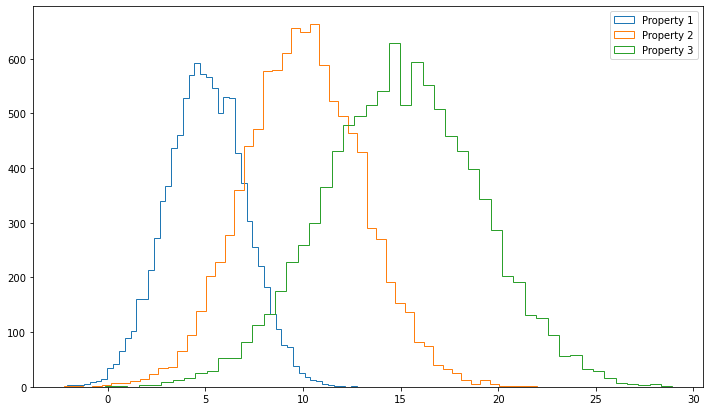

In [13]:
fig, ax = plt.subplots(figsize=(12,7))
ax.hist(X[:,0], bins=50, histtype="step", label="Property 1")
ax.hist(X[:,1], bins=50, histtype="step", label="Property 2")
ax.hist(X[:,2], bins=50, histtype="step", label="Property 3")
ax.legend()

Let's normalize the data so that the three properties add up to 1. Use `np.sum` to do this, with the correct "axis" keyword, then normalize so that the sum of the elements along that dimension are 1.

In [ ]:
X_sum =  #COMPLETE THESE TWO LINES OF CODE
print(X_sum.shape)
X_normed = 
print(X_normed.sum(axis=0))

Find the mean (`np.mean()`) and the standard deviation (`np.std()`) for each of the property after they have been normalized.

In [ ]:
X_mean =               #COMPLETE THESE TWO LINES OF CODE
print(X_mean.shape)
X_std = 
print(X_std.shape)

Computed the scaled dataset by subtracting the mean and dividing by the standard deviation corresponding to each property 

In [ ]:
X_scaled =      #COMPLETE THIS LINE OF CODE
print(X_scaled.shape)

We can verify the operation by seeing the distributions.

In [ ]:
fig, ax = plt.subplots(figsize=(12,7))
ax.hist(X_scaled[:,0], bins=50, histtype="step", label="Scaled property 1")
ax.hist(X_scaled[:,1], bins=50, histtype="step", label="Scaled property 2")
ax.hist(X_scaled[:,2], bins=50, histtype="step", label="Scaled property 3")
ax.legend()

# Summary
I hope by now you appreciate how efficiently (both in terms of run time and number of lines of code written) we can perform operations on multi-dimensional arrays using NumPy.   
**If there are three main lessons to be learnt from this tutorial, they should be:**
- vectorize (eliminate loops!)
- vectorize (eliminate loops!)
- vectorize (eliminate loops!)

# Acknowledments
This tutorial is heavily derived from the following sources. It is recommended to check them out for a comprehensive coverage of topics.
- [scipy-lectures](https://scipy-lectures.org/)
- [The Python Data Science Handbook](https://jakevdp.github.io/PythonDataScienceHandbook/)
- [2016 Python Bootcamp for UW Astronomy and Physics](https://github.com/bmorris3/2014_fall_ASTR599)
- [Numpy Documentation](https://numpy.org/doc/stable/)